In [1]:
%matplotlib notebook
import pandas as pd
#from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.set_option('display.max_rows', None)
country_data = "/Users/shilpa/Desktop/Boringppl_project/WasteManagement/Data/country_level_data_0.csv"
country_data_df = pd.read_csv(country_data, encoding = 'utf-8')
country_data_df.columns



Index(['iso3c', 'region_id', 'country_name', 'income_id', 'gdp',
       'composition_food_organic_waste_percent', 'composition_glass_percent',
       'composition_metal_percent', 'composition_other_percent',
       'composition_paper_cardboard_percent', 'composition_plastic_percent',
       'composition_rubber_leather_percent', 'composition_wood_percent',
       'composition_yard_garden_green_waste_percent',
       'other_information_information_system_for_solid_waste_management',
       'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations',
       'other_information_national_law_governing_solid_waste_management_in_the_country',
       'other_information_ppp_rules_and_regulations',
       'other_information_summary_of_key_solid_waste_information_made_available_to_the_public',
       'population_population_number_of_people',
       'special_waste_agricultural_waste_tons_year',
       'special_waste_construction_and_demolition_waste_tons_year',
       'special_w

In [3]:
Treat = country_data_df[['country_name', 
                             'income_id',
                             'total_msw_total_msw_generated_tons_year',
                       'waste_treatment_anaerobic_digestion_percent',
                       'waste_treatment_compost_percent',
                       'waste_treatment_controlled_landfill_percent',
                       'waste_treatment_incineration_percent',
                       'waste_treatment_landfill_unspecified_percent',
                       'waste_treatment_open_dump_percent', 
                       'waste_treatment_other_percent',
                       'waste_treatment_recycling_percent',
                       'waste_treatment_sanitary_landfill_landfill_gas_system_percent',
                       'waste_treatment_unaccounted_for_percent',
                       'waste_treatment_waterways_marine_percent']]
Treat.fillna(0).set_index('country_name')

df_nan = Treat.dropna(subset = ['country_name'], axis=0, how='all')
Treatment = df_nan.dropna(subset = ['total_msw_total_msw_generated_tons_year'], axis=0, how='all')
Treatment.fillna(0).head(3)


,country_name,income_id,total_msw_total_msw_generated_tons_year,waste_treatment_anaerobic_digestion_percent,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent
0,Aruba,HIC,8.813202e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,89.0,0.0
1,Afghanistan,LIC,5.628525e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Angola,LMC,4.213644e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
Treatment_LIC = Treatment.groupby('income_id').get_group('LIC').fillna(0).drop_duplicates().set_index('country_name')
df1 = Treatment_LIC.sum(axis=0)
df_LIC= pd.DataFrame(df1)


Treatment_LMC = Treatment.groupby('income_id').get_group('LMC').fillna(0).drop_duplicates().set_index('country_name')
df2 = Treatment_LMC.sum(axis=0)
df_LMC= pd.DataFrame(df2)


Treatment_UMC = Treatment.groupby('income_id').get_group('UMC').fillna(0).drop_duplicates().set_index('country_name')
df3 = Treatment_UMC.sum(axis=0)
df_UMC= pd.DataFrame(df3)

Treatment_HIC = Treatment.groupby('income_id').get_group('HIC').fillna(0).drop_duplicates().set_index('country_name')
df4 = Treatment_HIC.sum(axis=0)
df_HIC= pd.DataFrame(df4)

df_Treatment = pd.concat([df_LIC,df_LMC,df_UMC,df_HIC ], axis=1)
df_Treatment.columns=["LIC", "LMC", "UMC", "HIC"]

df_Treatment.index.names = ['Treatment']
df_Treatment["Total"] = df_Treatment["LIC"] + df_Treatment["LMC"] + df_Treatment["UMC"] + df_Treatment["HIC"]
df_world = df_Treatment.drop(['income_id'])
df_world.T


Treatment,total_msw_total_msw_generated_tons_year,waste_treatment_anaerobic_digestion_percent,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent
LIC,9.45164e+07,0,9.67,27.04,0,74,862.7,39.3,86.4,7,690.19,8
LMC,4.37017e+08,0,60.54,386.67,2.73,421.67,1118.07,185.5,234.88,177.73,846.75,81
UMC,6.20579e+08,0.3,73.47,742.995,41.76,871.75,1327.13,60.725,299.821,715.575,720.348,63
HIC,6.85796e+08,0.1,409.707,658.458,1256.16,1611.87,417.92,44.38,1532.97,341.67,827.992,0.1
Total,1.83791e+09,0.4,553.387,1815.16,1300.65,2979.29,3725.82,329.905,2154.07,1241.98,3085.28,152.1


In [5]:
#### Groupby LIC
#### Calculate raw value: (each waste treatment*totalMSW)/100
#### Drop old data
#### Total Raw Sum value : Sum of all raw values 
#### Now calculate the percent of each waste treatment : (Each waste raw value/ Total Raw Sum) * 100

In [6]:
Treatment_LIC = Treatment.groupby('income_id').get_group('LIC').fillna(0).drop_duplicates().set_index('country_name')
df1 = Treatment_LIC.sum(axis=0)
df_LIC= pd.DataFrame(df1)
transformed_df_LIC = df_LIC.T
transformed_df_LIC


transformed_df_LIC['Anaerobic'] = (transformed_df_LIC['waste_treatment_anaerobic_digestion_percent']\
                                   *transformed_df_LIC['total_msw_total_msw_generated_tons_year']) / 100


transformed_df_LIC['Compost'] = (transformed_df_LIC['waste_treatment_compost_percent']\
                                 *transformed_df_LIC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_LIC['ControlledLandfill'] = (transformed_df_LIC['waste_treatment_controlled_landfill_percent']\
                                 *transformed_df_LIC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_LIC['Incineration'] = (transformed_df_LIC['waste_treatment_incineration_percent']\
                                 *transformed_df_LIC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_LIC['UnspecifiedLandfill'] = (transformed_df_LIC['waste_treatment_landfill_unspecified_percent']\
                                 *transformed_df_LIC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_LIC['OpenDump'] = (transformed_df_LIC['waste_treatment_open_dump_percent']\
                                 *transformed_df_LIC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_LIC['Other'] = (transformed_df_LIC['waste_treatment_other_percent']\
                                 *transformed_df_LIC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_LIC['Recycling'] = (transformed_df_LIC['waste_treatment_recycling_percent']\
                                 *transformed_df_LIC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_LIC['Sani_Land_Gas'] = (transformed_df_LIC['waste_treatment_sanitary_landfill_landfill_gas_system_percent']\
                                 *transformed_df_LIC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_LIC['Unaccounted'] = (transformed_df_LIC['waste_treatment_unaccounted_for_percent']\
                                 *transformed_df_LIC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_LIC['Marine_Waterways'] = (transformed_df_LIC['waste_treatment_waterways_marine_percent']\
                                 *transformed_df_LIC['total_msw_total_msw_generated_tons_year']) / 100


transformed_df_LIC = transformed_df_LIC.drop(['total_msw_total_msw_generated_tons_year',
    'waste_treatment_anaerobic_digestion_percent',
       'waste_treatment_compost_percent',
       'waste_treatment_controlled_landfill_percent',
       'waste_treatment_incineration_percent',
       'waste_treatment_landfill_unspecified_percent',
       'waste_treatment_open_dump_percent', 'waste_treatment_other_percent',
       'waste_treatment_recycling_percent',
       'waste_treatment_sanitary_landfill_landfill_gas_system_percent',
       'waste_treatment_unaccounted_for_percent',
       'waste_treatment_waterways_marine_percent'], axis=1)

transformed_df_LIC


transformed_df_LIC['RawSumHIC'] = transformed_df_LIC.apply(lambda row: row['Anaerobic'] + row['Compost']+ row['ControlledLandfill']+ row['Incineration']+ \
                   row['UnspecifiedLandfill']+ row['OpenDump']+ row['Other']+ row['Recycling']+ \
                   row['Sani_Land_Gas']+ row['Unaccounted']+ row['Marine_Waterways'], axis=1)
transformed_df_LIC

transformed_df_LIC['%Anaerobic'] = (transformed_df_LIC['Anaerobic']/transformed_df_LIC['RawSumHIC']) * 100
transformed_df_LIC['%Compost'] = (transformed_df_LIC['Compost']/transformed_df_LIC['RawSumHIC']) * 100
transformed_df_LIC['%ControlledLandfill'] = (transformed_df_LIC['ControlledLandfill']/transformed_df_LIC['RawSumHIC']) * 100
transformed_df_LIC['%Incineration'] = (transformed_df_LIC['Incineration']/transformed_df_LIC['RawSumHIC']) * 100
transformed_df_LIC['%UnspecifiedLandfill'] = (transformed_df_LIC['UnspecifiedLandfill']/transformed_df_LIC['RawSumHIC']) * 100
transformed_df_LIC['%OpenDump'] = (transformed_df_LIC['OpenDump']/transformed_df_LIC['RawSumHIC']) * 100
transformed_df_LIC['%Other'] = (transformed_df_LIC['Other']/transformed_df_LIC['RawSumHIC']) * 100
transformed_df_LIC['%Recycling'] = (transformed_df_LIC['Recycling']/transformed_df_LIC['RawSumHIC']) * 100
transformed_df_LIC['%Sani_Land_Gas'] = (transformed_df_LIC['Sani_Land_Gas']/transformed_df_LIC['RawSumHIC']) * 100
transformed_df_LIC['%Unaccounted'] = (transformed_df_LIC['Unaccounted']/transformed_df_LIC['RawSumHIC']) * 100
transformed_df_LIC['%Marine_Waterways'] = (transformed_df_LIC['Marine_Waterways']/transformed_df_LIC['RawSumHIC']) * 100

transformed_df_LIC


Percent_LIC = transformed_df_LIC.drop(['Anaerobic','Compost',
       'ControlledLandfill',
       'Incineration',
       'UnspecifiedLandfill',
       'OpenDump', 'Other',
       'Recycling',
       'Sani_Land_Gas',
       'Unaccounted',
       'Marine_Waterways','RawSumHIC'], axis=1)
df_LIC = pd.DataFrame(Percent_LIC)
df_LIC




,income_id,%Anaerobic,%Compost,%ControlledLandfill,%Incineration,%UnspecifiedLandfill,%OpenDump,%Other,%Recycling,%Sani_Land_Gas,%Unaccounted,%Marine_Waterways
0,LICLICLICLICLICLICLICLICLICLICLICLICLICLICLICL...,0,0.535942,1.49864,0,4.10131,47.8136,2.17813,4.78856,0.387962,38.2525,0.443385


In [7]:
#### Groupby LMC
#### Calculate raw value: (each waste treatment*totalMSW)/100
#### Drop old data
#### Total Raw Sum value : Sum of all raw values 
#### Now calculate the percent of each waste treatment : (Each waste raw value/ Total Raw Sum) * 100

In [8]:
Treatment_LMC = Treatment.groupby('income_id').get_group('LMC').fillna(0).drop_duplicates().set_index('country_name')
df2 = Treatment_LMC.sum(axis=0)
df_LMC= pd.DataFrame(df2)
transformed_df_LMC = df_LMC.T
transformed_df_LMC


transformed_df_LMC['Anaerobic'] = (transformed_df_LMC['waste_treatment_anaerobic_digestion_percent']\
                                   *transformed_df_LMC['total_msw_total_msw_generated_tons_year']) / 100


transformed_df_LMC['Compost'] = (transformed_df_LMC['waste_treatment_compost_percent']\
                                 *transformed_df_LMC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_LMC['ControlledLandfill'] = (transformed_df_LMC['waste_treatment_controlled_landfill_percent']\
                                 *transformed_df_LMC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_LMC['Incineration'] = (transformed_df_LMC['waste_treatment_incineration_percent']\
                                 *transformed_df_LMC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_LMC['UnspecifiedLandfill'] = (transformed_df_LMC['waste_treatment_landfill_unspecified_percent']\
                                 *transformed_df_LMC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_LMC['OpenDump'] = (transformed_df_LMC['waste_treatment_open_dump_percent']\
                                 *transformed_df_LMC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_LMC['Other'] = (transformed_df_LMC['waste_treatment_other_percent']\
                                 *transformed_df_LMC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_LMC['Recycling'] = (transformed_df_LMC['waste_treatment_recycling_percent']\
                                 *transformed_df_LMC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_LMC['Sani_Land_Gas'] = (transformed_df_LMC['waste_treatment_sanitary_landfill_landfill_gas_system_percent']\
                                 *transformed_df_LMC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_LMC['Unaccounted'] = (transformed_df_LMC['waste_treatment_unaccounted_for_percent']\
                                 *transformed_df_LMC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_LMC['Marine_Waterways'] = (transformed_df_LMC['waste_treatment_waterways_marine_percent']\
                                 *transformed_df_LMC['total_msw_total_msw_generated_tons_year']) / 100


transformed_df_LMC = transformed_df_LMC.drop(['total_msw_total_msw_generated_tons_year',
    'waste_treatment_anaerobic_digestion_percent',
       'waste_treatment_compost_percent',
       'waste_treatment_controlled_landfill_percent',
       'waste_treatment_incineration_percent',
       'waste_treatment_landfill_unspecified_percent',
       'waste_treatment_open_dump_percent', 'waste_treatment_other_percent',
       'waste_treatment_recycling_percent',
       'waste_treatment_sanitary_landfill_landfill_gas_system_percent',
       'waste_treatment_unaccounted_for_percent',
       'waste_treatment_waterways_marine_percent'], axis=1)

transformed_df_LMC

transformed_df_LMC['RawSumHIC'] = transformed_df_LMC.apply(lambda row: row['Anaerobic'] + row['Compost']+ row['ControlledLandfill']+ row['Incineration']+ \
                   row['UnspecifiedLandfill']+ row['OpenDump']+ row['Other']+ row['Recycling']+ \
                   row['Sani_Land_Gas']+ row['Unaccounted']+ row['Marine_Waterways'], axis=1)
transformed_df_LMC


transformed_df_LMC['%Anaerobic'] = (transformed_df_LMC['Anaerobic']/transformed_df_LMC['RawSumHIC']) * 100
transformed_df_LMC['%Compost'] = (transformed_df_LMC['Compost']/transformed_df_LMC['RawSumHIC']) * 100
transformed_df_LMC['%ControlledLandfill'] = (transformed_df_LMC['ControlledLandfill']/transformed_df_LMC['RawSumHIC']) * 100
transformed_df_LMC['%Incineration'] = (transformed_df_LMC['Incineration']/transformed_df_LMC['RawSumHIC']) * 100
transformed_df_LMC['%UnspecifiedLandfill'] = (transformed_df_LMC['UnspecifiedLandfill']/transformed_df_LMC['RawSumHIC']) * 100
transformed_df_LMC['%OpenDump'] = (transformed_df_LMC['OpenDump']/transformed_df_LMC['RawSumHIC']) * 100
transformed_df_LMC['%Other'] = (transformed_df_LMC['Other']/transformed_df_LMC['RawSumHIC']) * 100
transformed_df_LMC['%Recycling'] = (transformed_df_LMC['Recycling']/transformed_df_LMC['RawSumHIC']) * 100
transformed_df_LMC['%Sani_Land_Gas'] = (transformed_df_LMC['Sani_Land_Gas']/transformed_df_LMC['RawSumHIC']) * 100
transformed_df_LMC['%Unaccounted'] = (transformed_df_LMC['Unaccounted']/transformed_df_LMC['RawSumHIC']) * 100
transformed_df_LMC['%Marine_Waterways'] = (transformed_df_LMC['Marine_Waterways']/transformed_df_LMC['RawSumHIC']) * 100

transformed_df_LMC


Percent_LMC = transformed_df_LMC.drop(['Anaerobic','Compost',
       'ControlledLandfill',
       'Incineration',
       'UnspecifiedLandfill',
       'OpenDump', 'Other',
       'Recycling',
       'Sani_Land_Gas',
       'Unaccounted',
       'Marine_Waterways','RawSumHIC'], axis=1)
df_LMC = pd.DataFrame(Percent_LMC)
df_LMC








,income_id,%Anaerobic,%Compost,%ControlledLandfill,%Incineration,%UnspecifiedLandfill,%OpenDump,%Other,%Recycling,%Sani_Land_Gas,%Unaccounted,%Marine_Waterways
0,LMCLMCLMCLMCLMCLMCLMCLMCLMCLMCLMCLMCLMCLMCLMCL...,0,1.72207,10.9989,0.0776552,11.9945,31.8036,5.27657,6.68119,5.05555,24.0859,2.30406


In [9]:
Treatment_UMC = Treatment.groupby('income_id').get_group('UMC').fillna(0).drop_duplicates().set_index('country_name')
df3 = Treatment_UMC.sum(axis=0)
df_UMC= pd.DataFrame(df3)
transformed_df_UMC = df_UMC.T
transformed_df_UMC


transformed_df_UMC['Anaerobic'] = (transformed_df_UMC['waste_treatment_anaerobic_digestion_percent']\
                                   *transformed_df_UMC['total_msw_total_msw_generated_tons_year']) / 100


transformed_df_UMC['Compost'] = (transformed_df_UMC['waste_treatment_compost_percent']\
                                 *transformed_df_UMC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_UMC['ControlledLandfill'] = (transformed_df_UMC['waste_treatment_controlled_landfill_percent']\
                                 *transformed_df_UMC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_UMC['Incineration'] = (transformed_df_UMC['waste_treatment_incineration_percent']\
                                 *transformed_df_UMC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_UMC['UnspecifiedLandfill'] = (transformed_df_UMC['waste_treatment_landfill_unspecified_percent']\
                                 *transformed_df_UMC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_UMC['OpenDump'] = (transformed_df_UMC['waste_treatment_open_dump_percent']\
                                 *transformed_df_UMC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_UMC['Other'] = (transformed_df_UMC['waste_treatment_other_percent']\
                                 *transformed_df_UMC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_UMC['Recycling'] = (transformed_df_UMC['waste_treatment_recycling_percent']\
                                 *transformed_df_UMC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_UMC['Sani_Land_Gas'] = (transformed_df_UMC['waste_treatment_sanitary_landfill_landfill_gas_system_percent']\
                                 *transformed_df_UMC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_UMC['Unaccounted'] = (transformed_df_UMC['waste_treatment_unaccounted_for_percent']\
                                 *transformed_df_UMC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_UMC['Marine_Waterways'] = (transformed_df_UMC['waste_treatment_waterways_marine_percent']\
                                 *transformed_df_UMC['total_msw_total_msw_generated_tons_year']) / 100


transformed_df_UMC = transformed_df_UMC.drop(['total_msw_total_msw_generated_tons_year',
    'waste_treatment_anaerobic_digestion_percent',
       'waste_treatment_compost_percent',
       'waste_treatment_controlled_landfill_percent',
       'waste_treatment_incineration_percent',
       'waste_treatment_landfill_unspecified_percent',
       'waste_treatment_open_dump_percent', 'waste_treatment_other_percent',
       'waste_treatment_recycling_percent',
       'waste_treatment_sanitary_landfill_landfill_gas_system_percent',
       'waste_treatment_unaccounted_for_percent',
       'waste_treatment_waterways_marine_percent'], axis=1)

transformed_df_UMC


transformed_df_UMC['RawSumHIC'] = transformed_df_UMC.apply(lambda row: row['Anaerobic'] + row['Compost']+ row['ControlledLandfill']+ row['Incineration']+ \
                   row['UnspecifiedLandfill']+ row['OpenDump']+ row['Other']+ row['Recycling']+ \
                   row['Sani_Land_Gas']+ row['Unaccounted']+ row['Marine_Waterways'], axis=1)
transformed_df_UMC

transformed_df_UMC['%Anaerobic'] = (transformed_df_UMC['Anaerobic']/transformed_df_UMC['RawSumHIC']) * 100
transformed_df_UMC['%Compost'] = (transformed_df_UMC['Compost']/transformed_df_UMC['RawSumHIC']) * 100
transformed_df_UMC['%ControlledLandfill'] = (transformed_df_UMC['ControlledLandfill']/transformed_df_UMC['RawSumHIC']) * 100
transformed_df_UMC['%Incineration'] = (transformed_df_UMC['Incineration']/transformed_df_UMC['RawSumHIC']) * 100
transformed_df_UMC['%UnspecifiedLandfill'] = (transformed_df_UMC['UnspecifiedLandfill']/transformed_df_UMC['RawSumHIC']) * 100
transformed_df_UMC['%OpenDump'] = (transformed_df_UMC['OpenDump']/transformed_df_UMC['RawSumHIC']) * 100
transformed_df_UMC['%Other'] = (transformed_df_UMC['Other']/transformed_df_UMC['RawSumHIC']) * 100
transformed_df_UMC['%Recycling'] = (transformed_df_UMC['Recycling']/transformed_df_UMC['RawSumHIC']) * 100
transformed_df_UMC['%Sani_Land_Gas'] = (transformed_df_UMC['Sani_Land_Gas']/transformed_df_UMC['RawSumHIC']) * 100
transformed_df_UMC['%Unaccounted'] = (transformed_df_UMC['Unaccounted']/transformed_df_UMC['RawSumHIC']) * 100
transformed_df_UMC['%Marine_Waterways'] = (transformed_df_UMC['Marine_Waterways']/transformed_df_UMC['RawSumHIC']) * 100

transformed_df_UMC


Percent_UMC = transformed_df_UMC.drop(['Anaerobic','Compost',
       'ControlledLandfill',
       'Incineration',
       'UnspecifiedLandfill',
       'OpenDump', 'Other',
       'Recycling',
       'Sani_Land_Gas',
       'Unaccounted',
       'Marine_Waterways','RawSumHIC'], axis=1)
df_UMC = pd.DataFrame(Percent_UMC)
df_UMC








,income_id,%Anaerobic,%Compost,%ControlledLandfill,%Incineration,%UnspecifiedLandfill,%OpenDump,%Other,%Recycling,%Sani_Land_Gas,%Unaccounted,%Marine_Waterways
0,UMCUMCUMCUMCUMCUMCUMCUMCUMCUMCUMCUMCUMCUMCUMCU...,0.00610144,1.49424,15.1111,0.849321,17.7298,26.9913,1.23503,6.0978,14.5535,14.6505,1.2813


In [10]:
#### Groupby HIC
#### Calculate raw value: (each waste treatment*totalMSW)/100
#### Drop old data
#### Total Raw Sum value : Sum of all raw values 
#### Now calculate the percent of each waste treatment : (Each waste raw value/ Total Raw Sum) * 100

In [11]:
Treatment_HIC = Treatment.groupby('income_id').get_group('HIC').fillna(0).drop_duplicates().set_index('country_name')
df4 = Treatment_HIC.sum(axis=0)
df_HIC= pd.DataFrame(df4)
transformed_df_HIC = df_HIC.T
transformed_df_HIC


transformed_df_HIC['Anaerobic'] = (transformed_df_HIC['waste_treatment_anaerobic_digestion_percent']\
                                   *transformed_df_HIC['total_msw_total_msw_generated_tons_year']) / 100


transformed_df_HIC['Compost'] = (transformed_df_HIC['waste_treatment_compost_percent']\
                                 *transformed_df_HIC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_HIC['ControlledLandfill'] = (transformed_df_HIC['waste_treatment_controlled_landfill_percent']\
                                 *transformed_df_HIC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_HIC['Incineration'] = (transformed_df_HIC['waste_treatment_incineration_percent']\
                                 *transformed_df_HIC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_HIC['UnspecifiedLandfill'] = (transformed_df_HIC['waste_treatment_landfill_unspecified_percent']\
                                 *transformed_df_HIC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_HIC['OpenDump'] = (transformed_df_HIC['waste_treatment_open_dump_percent']\
                                 *transformed_df_HIC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_HIC['Other'] = (transformed_df_HIC['waste_treatment_other_percent']\
                                 *transformed_df_HIC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_HIC['Recycling'] = (transformed_df_HIC['waste_treatment_recycling_percent']\
                                 *transformed_df_HIC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_HIC['Sani_Land_Gas'] = (transformed_df_HIC['waste_treatment_sanitary_landfill_landfill_gas_system_percent']\
                                 *transformed_df_HIC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_HIC['Unaccounted'] = (transformed_df_HIC['waste_treatment_unaccounted_for_percent']\
                                 *transformed_df_HIC['total_msw_total_msw_generated_tons_year']) / 100

transformed_df_HIC['Marine_Waterways'] = (transformed_df_HIC['waste_treatment_waterways_marine_percent']\
                                 *transformed_df_HIC['total_msw_total_msw_generated_tons_year']) / 100


transformed_df_HIC = transformed_df_HIC.drop(['total_msw_total_msw_generated_tons_year',
    'waste_treatment_anaerobic_digestion_percent',
       'waste_treatment_compost_percent',
       'waste_treatment_controlled_landfill_percent',
       'waste_treatment_incineration_percent',
       'waste_treatment_landfill_unspecified_percent',
       'waste_treatment_open_dump_percent', 'waste_treatment_other_percent',
       'waste_treatment_recycling_percent',
       'waste_treatment_sanitary_landfill_landfill_gas_system_percent',
       'waste_treatment_unaccounted_for_percent',
       'waste_treatment_waterways_marine_percent'], axis=1)

transformed_df_HIC

transformed_df_HIC['RawSumHIC'] = transformed_df_HIC.apply(lambda row: row['Anaerobic'] + row['Compost']+ row['ControlledLandfill']+ row['Incineration']+ \
                   row['UnspecifiedLandfill']+ row['OpenDump']+ row['Other']+ row['Recycling']+ \
                   row['Sani_Land_Gas']+ row['Unaccounted']+ row['Marine_Waterways'], axis=1)
transformed_df_HIC

transformed_df_HIC['%Anaerobic'] = (transformed_df_HIC['Anaerobic']/transformed_df_HIC['RawSumHIC']) * 100
transformed_df_HIC['%Compost'] = (transformed_df_HIC['Compost']/transformed_df_HIC['RawSumHIC']) * 100
transformed_df_HIC['%ControlledLandfill'] = (transformed_df_HIC['ControlledLandfill']/transformed_df_HIC['RawSumHIC']) * 100
transformed_df_HIC['%Incineration'] = (transformed_df_HIC['Incineration']/transformed_df_HIC['RawSumHIC']) * 100
transformed_df_HIC['%UnspecifiedLandfill'] = (transformed_df_HIC['UnspecifiedLandfill']/transformed_df_HIC['RawSumHIC']) * 100
transformed_df_HIC['%OpenDump'] = (transformed_df_HIC['OpenDump']/transformed_df_HIC['RawSumHIC']) * 100
transformed_df_HIC['%Other'] = (transformed_df_HIC['Other']/transformed_df_HIC['RawSumHIC']) * 100
transformed_df_HIC['%Recycling'] = (transformed_df_HIC['Recycling']/transformed_df_HIC['RawSumHIC']) * 100
transformed_df_HIC['%Sani_Land_Gas'] = (transformed_df_HIC['Sani_Land_Gas']/transformed_df_HIC['RawSumHIC']) * 100
transformed_df_HIC['%Unaccounted'] = (transformed_df_HIC['Unaccounted']/transformed_df_HIC['RawSumHIC']) * 100
transformed_df_HIC['%Marine_Waterways'] = (transformed_df_HIC['Marine_Waterways']/transformed_df_HIC['RawSumHIC']) * 100


Percent_HIC = transformed_df_HIC.drop(['Anaerobic','Compost',
       'ControlledLandfill',
       'Incineration',
       'UnspecifiedLandfill',
       'OpenDump', 'Other',
       'Recycling',
       'Sani_Land_Gas',
       'Unaccounted',
       'Marine_Waterways','RawSumHIC'], axis=1)
df_HIC = pd.DataFrame(Percent_HIC)
df_HIC










,income_id,%Anaerobic,%Compost,%ControlledLandfill,%Incineration,%UnspecifiedLandfill,%OpenDump,%Other,%Recycling,%Sani_Land_Gas,%Unaccounted,%Marine_Waterways
0,HICHICHICHICHICHICHICHICHICHICHICHICHICHICHICH...,0.00140819,5.76944,9.27232,17.6891,22.6981,5.88509,0.624953,21.5871,4.81135,11.6597,0.00140819


In [12]:
## Summary table 

In [13]:
df_Percent = pd.concat([Percent_LIC, Percent_LMC, Percent_UMC, Percent_HIC], axis=0)
Income = ['LIC', 'LMC', 'UMC', 'HIC']
df_Percent['Income'] = Income
df_Percent
df_all_waste = df_Percent.drop(['income_id'], axis=1)
df_all_waste.set_index('Income').reset_index()

,Income,%Anaerobic,%Compost,%ControlledLandfill,%Incineration,%UnspecifiedLandfill,%OpenDump,%Other,%Recycling,%Sani_Land_Gas,%Unaccounted,%Marine_Waterways
0,LIC,0,0.535942,1.49864,0,4.10131,47.8136,2.17813,4.78856,0.387962,38.2525,0.443385
1,LMC,0,1.72207,10.9989,0.0776552,11.9945,31.8036,5.27657,6.68119,5.05555,24.0859,2.30406
2,UMC,0.00610144,1.49424,15.1111,0.849321,17.7298,26.9913,1.23503,6.0978,14.5535,14.6505,1.2813
3,HIC,0.00140819,5.76944,9.27232,17.6891,22.6981,5.88509,0.624953,21.5871,4.81135,11.6597,0.00140819


<IPython.core.display.Javascript object>


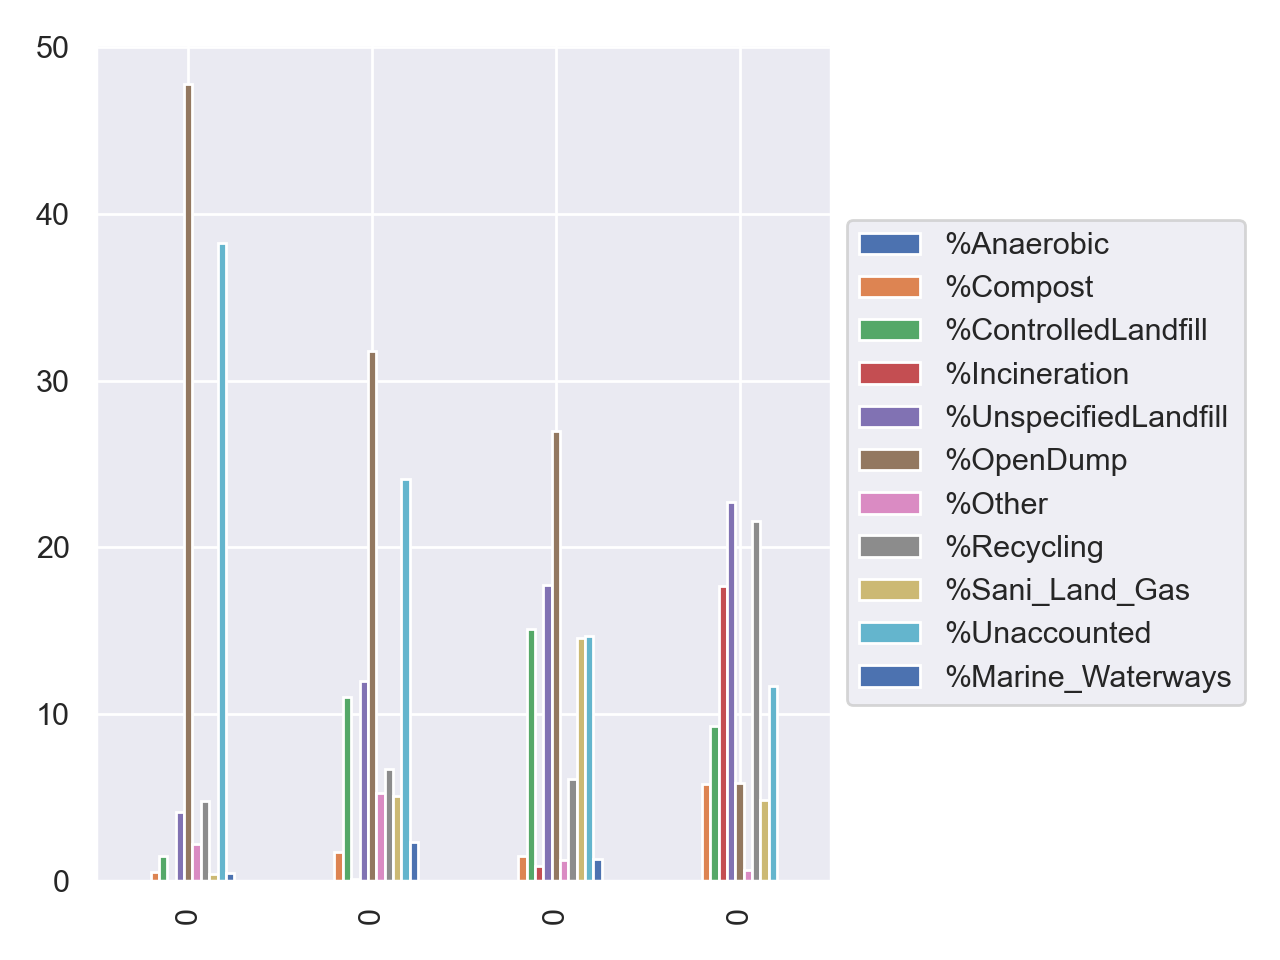

In [14]:
df_all_waste.plot.bar(legend=True, stacked=False);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

In [21]:
df_Percent = pd.concat([Percent_LIC, Percent_LMC, Percent_UMC, Percent_HIC], axis=0)
Income = ['LIC', 'LMC', 'UMC', 'HIC']
df_Percent['Income'] = Income
df_Percent
df_all_waste = df_Percent.drop(['income_id'], axis=1)
df_all_waste.set_index('Income').reset_index()

,Income,%Anaerobic,%Compost,%ControlledLandfill,%Incineration,%UnspecifiedLandfill,%OpenDump,%Other,%Recycling,%Sani_Land_Gas,%Unaccounted,%Marine_Waterways
0,LIC,0,0.535942,1.49864,0,4.10131,47.8136,2.17813,4.78856,0.387962,38.2525,0.443385
1,LMC,0,1.72207,10.9989,0.0776552,11.9945,31.8036,5.27657,6.68119,5.05555,24.0859,2.30406
2,UMC,0.00610144,1.49424,15.1111,0.849321,17.7298,26.9913,1.23503,6.0978,14.5535,14.6505,1.2813
3,HIC,0.00140819,5.76944,9.27232,17.6891,22.6981,5.88509,0.624953,21.5871,4.81135,11.6597,0.00140819


In [112]:
trial = df_all_waste.set_index('Income').reset_index()
a = trial.T.reset_index()
a.columns = a.iloc[0]
a
b = a.drop(a.index[0])
b
b.rename(columns={"Income": "Treatment"}, inplace=True)
# #a.columns
b

,Treatment,LIC,LMC,UMC,HIC
1,%Anaerobic,0,0,0.00610144,0.00140819
2,%Compost,0.535942,1.72207,1.49424,5.76944
3,%ControlledLandfill,1.49864,10.9989,15.1111,9.27232
4,%Incineration,0,0.0776552,0.849321,17.6891
5,%UnspecifiedLandfill,4.10131,11.9945,17.7298,22.6981
6,%OpenDump,47.8136,31.8036,26.9913,5.88509
7,%Other,2.17813,5.27657,1.23503,0.624953
8,%Recycling,4.78856,6.68119,6.0978,21.5871
9,%Sani_Land_Gas,0.387962,5.05555,14.5535,4.81135
10,%Unaccounted,38.2525,24.0859,14.6505,11.6597


In [121]:
b.iloc[2]

0
Treatment    %ControlledLandfill
LIC                      1.49864
LMC                      10.9989
UMC                      15.1111
HIC                      9.27232
Name: 3, dtype: object

In [110]:


trial_income = b['Treatment']
trial_LIC = b['LIC']
trial_LMC = b['LMC']
trial_UMC = b['UMC']
trial_HIC = b['HIC']


<IPython.core.display.Javascript object>


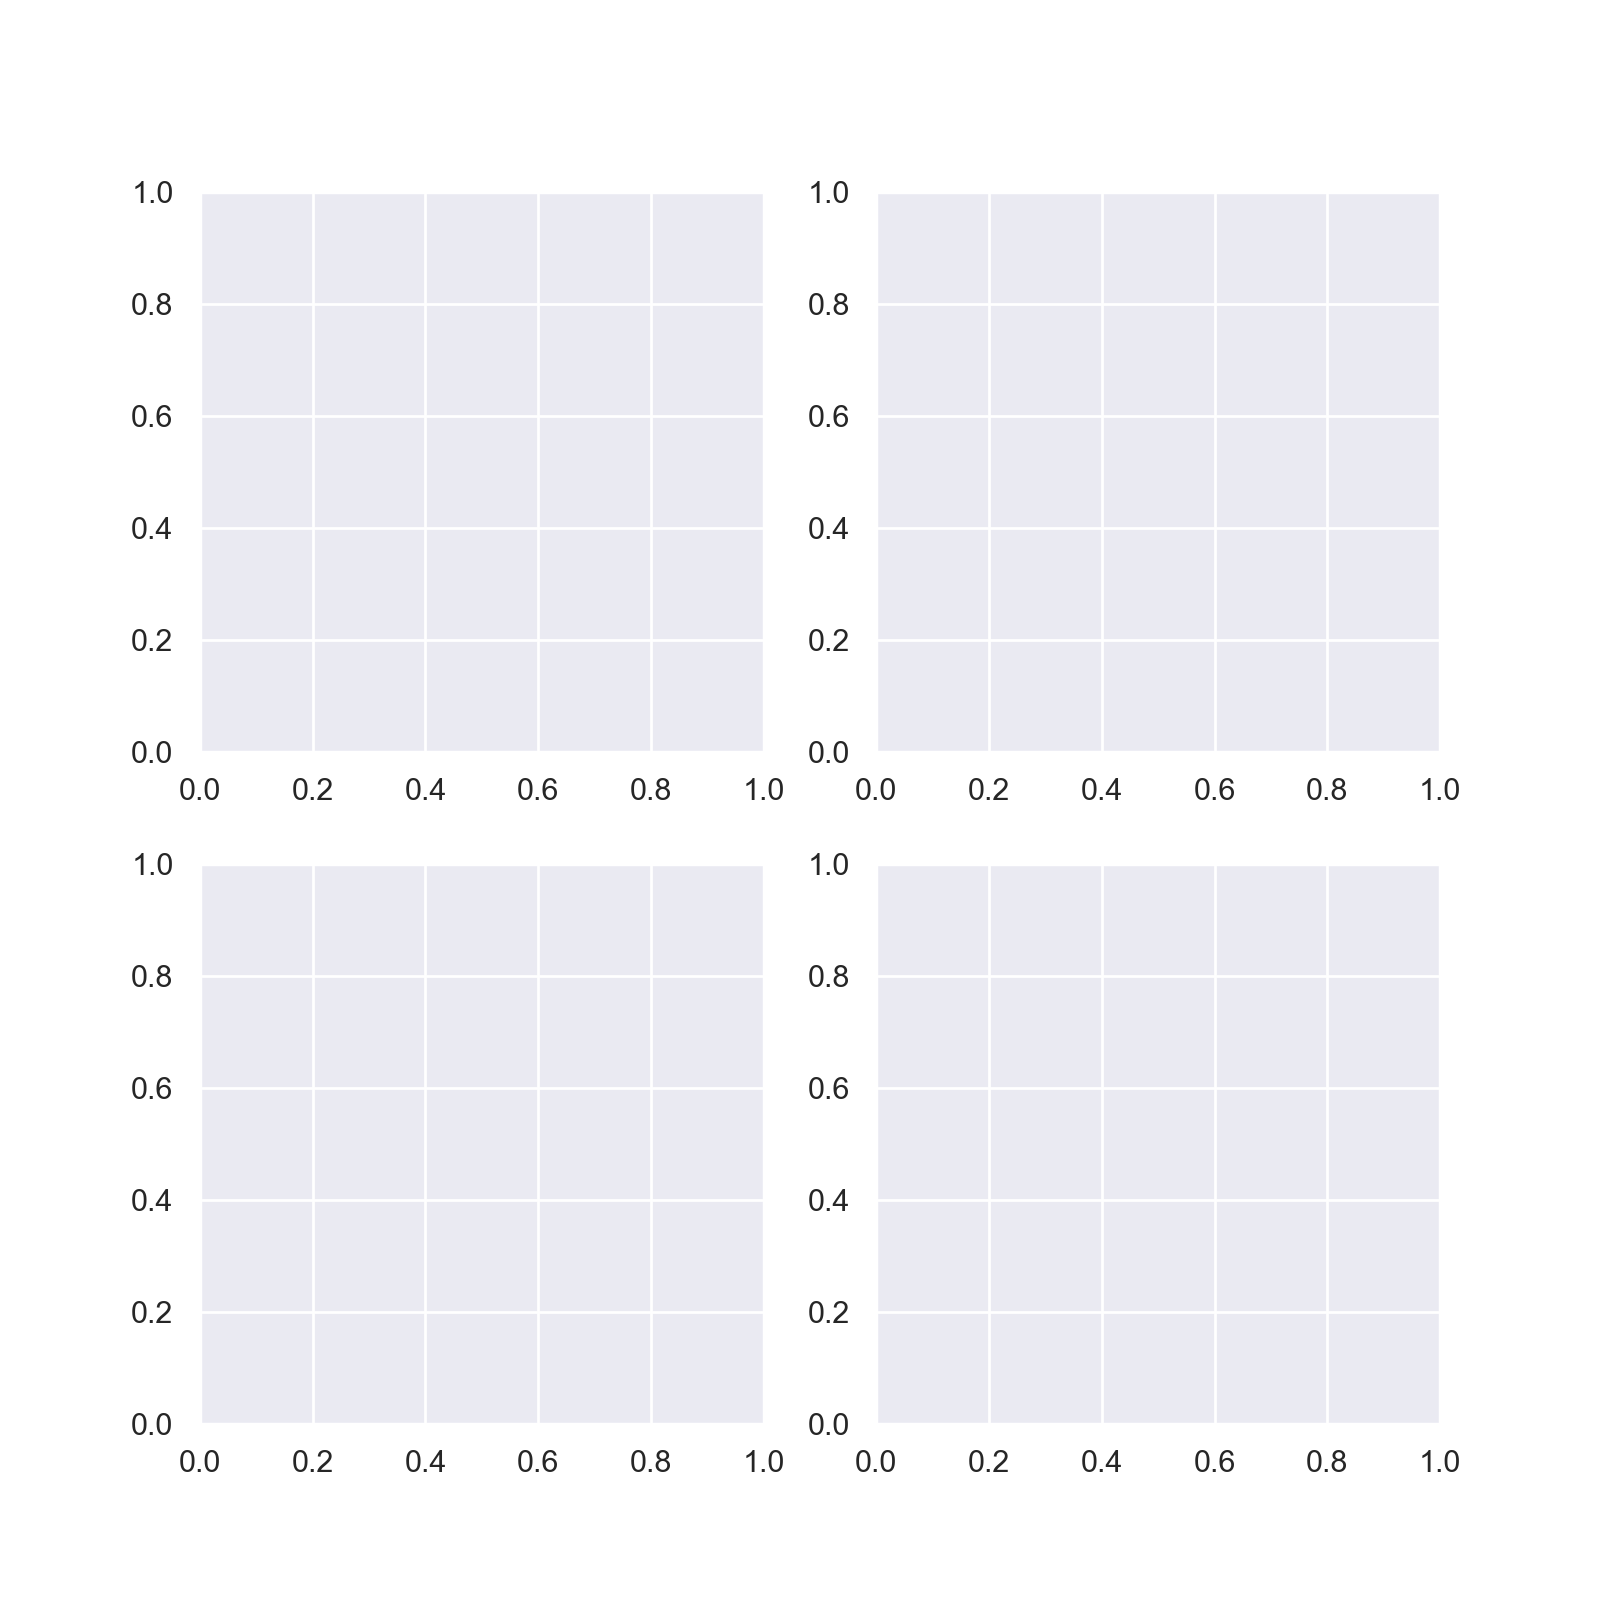

NameError: name 'x' is not defined

In [154]:
fig, axes = plt.subplots(figsize=(8,8),nrows=2, ncols=2)
axes[0,0].plot(x,y)
b['LIC'].plot(ax=axes[0,1], kind='bar', grid=True)
b['LMC'].plot(ax=axes[1,0], kind='bar', grid=True)
b['UMC'].plot(ax=axes[1,1], kind='bar', grid=True)
axes[0,0].grid(True)
axes[0,0].set_ylabel('Test')
axes[0,0].set_xlabel('Test2')
axes[0,1].set_ylabel('Test')

<IPython.core.display.Javascript object>


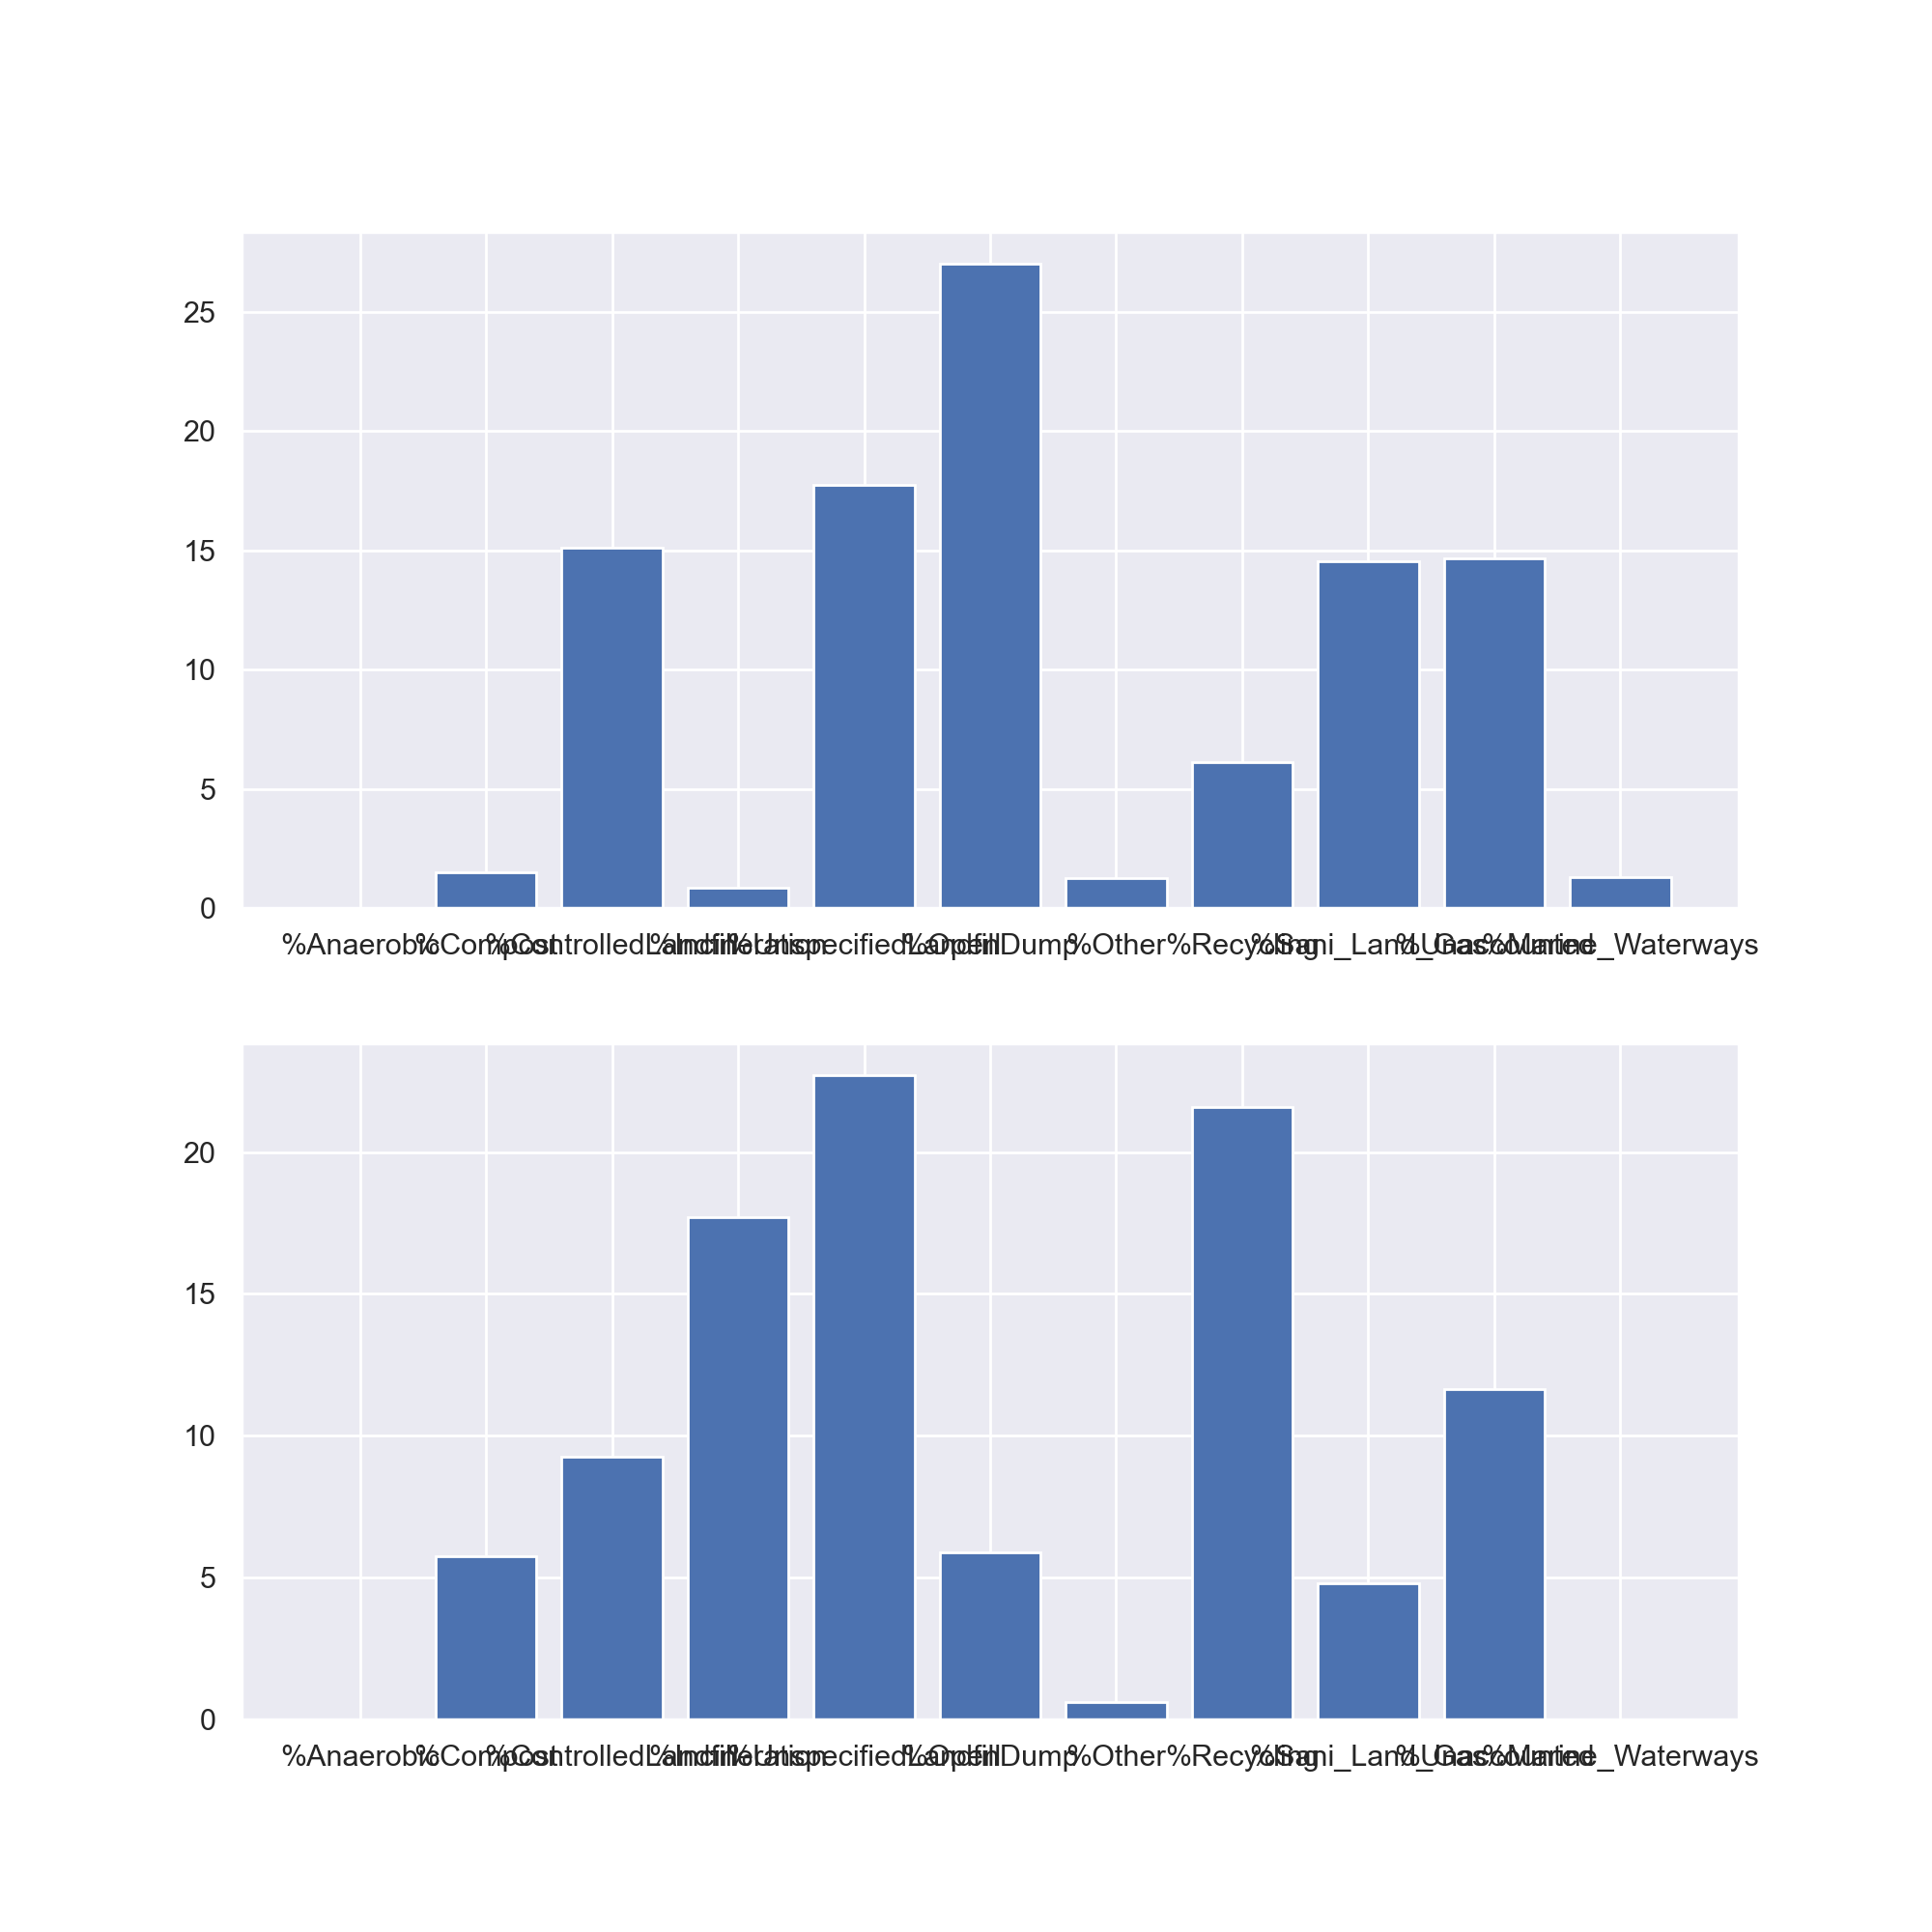

<BarContainer object of 11 artists>

In [142]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

ax1.bar(trial_income, trial_UMC)
ax2.bar(trial_income, trial_HIC)
#ax3.bar(trial_income, trial_UMC)
# ax4.bar(trial_income, trial_HIC, label='HIC')

# ax1.legend()
# ax1.set_title('LIC')
# ax1.set_xlabel('Types of waste treatment')
# ax1.set_ylabel('Percent')

# ax2.legend()
# ax2.set_title('LMC')
# ax2.set_xlabel('Types of waste treatment')
# ax2.set_ylabel('Percent')


# ax3.legend()
# ax3.set_title('UMC')
# ax3.set_xlabel('Types of waste treatment')
# ax3.set_ylabel('Percent')


# ax4.legend()
# ax4.set_title('HIC')
# ax4.set_xlabel('Types of waste treatment')
# ax4.set_ylabel('Percent')

# plt.tight_layout()
# plt.show

<IPython.core.display.Javascript object>


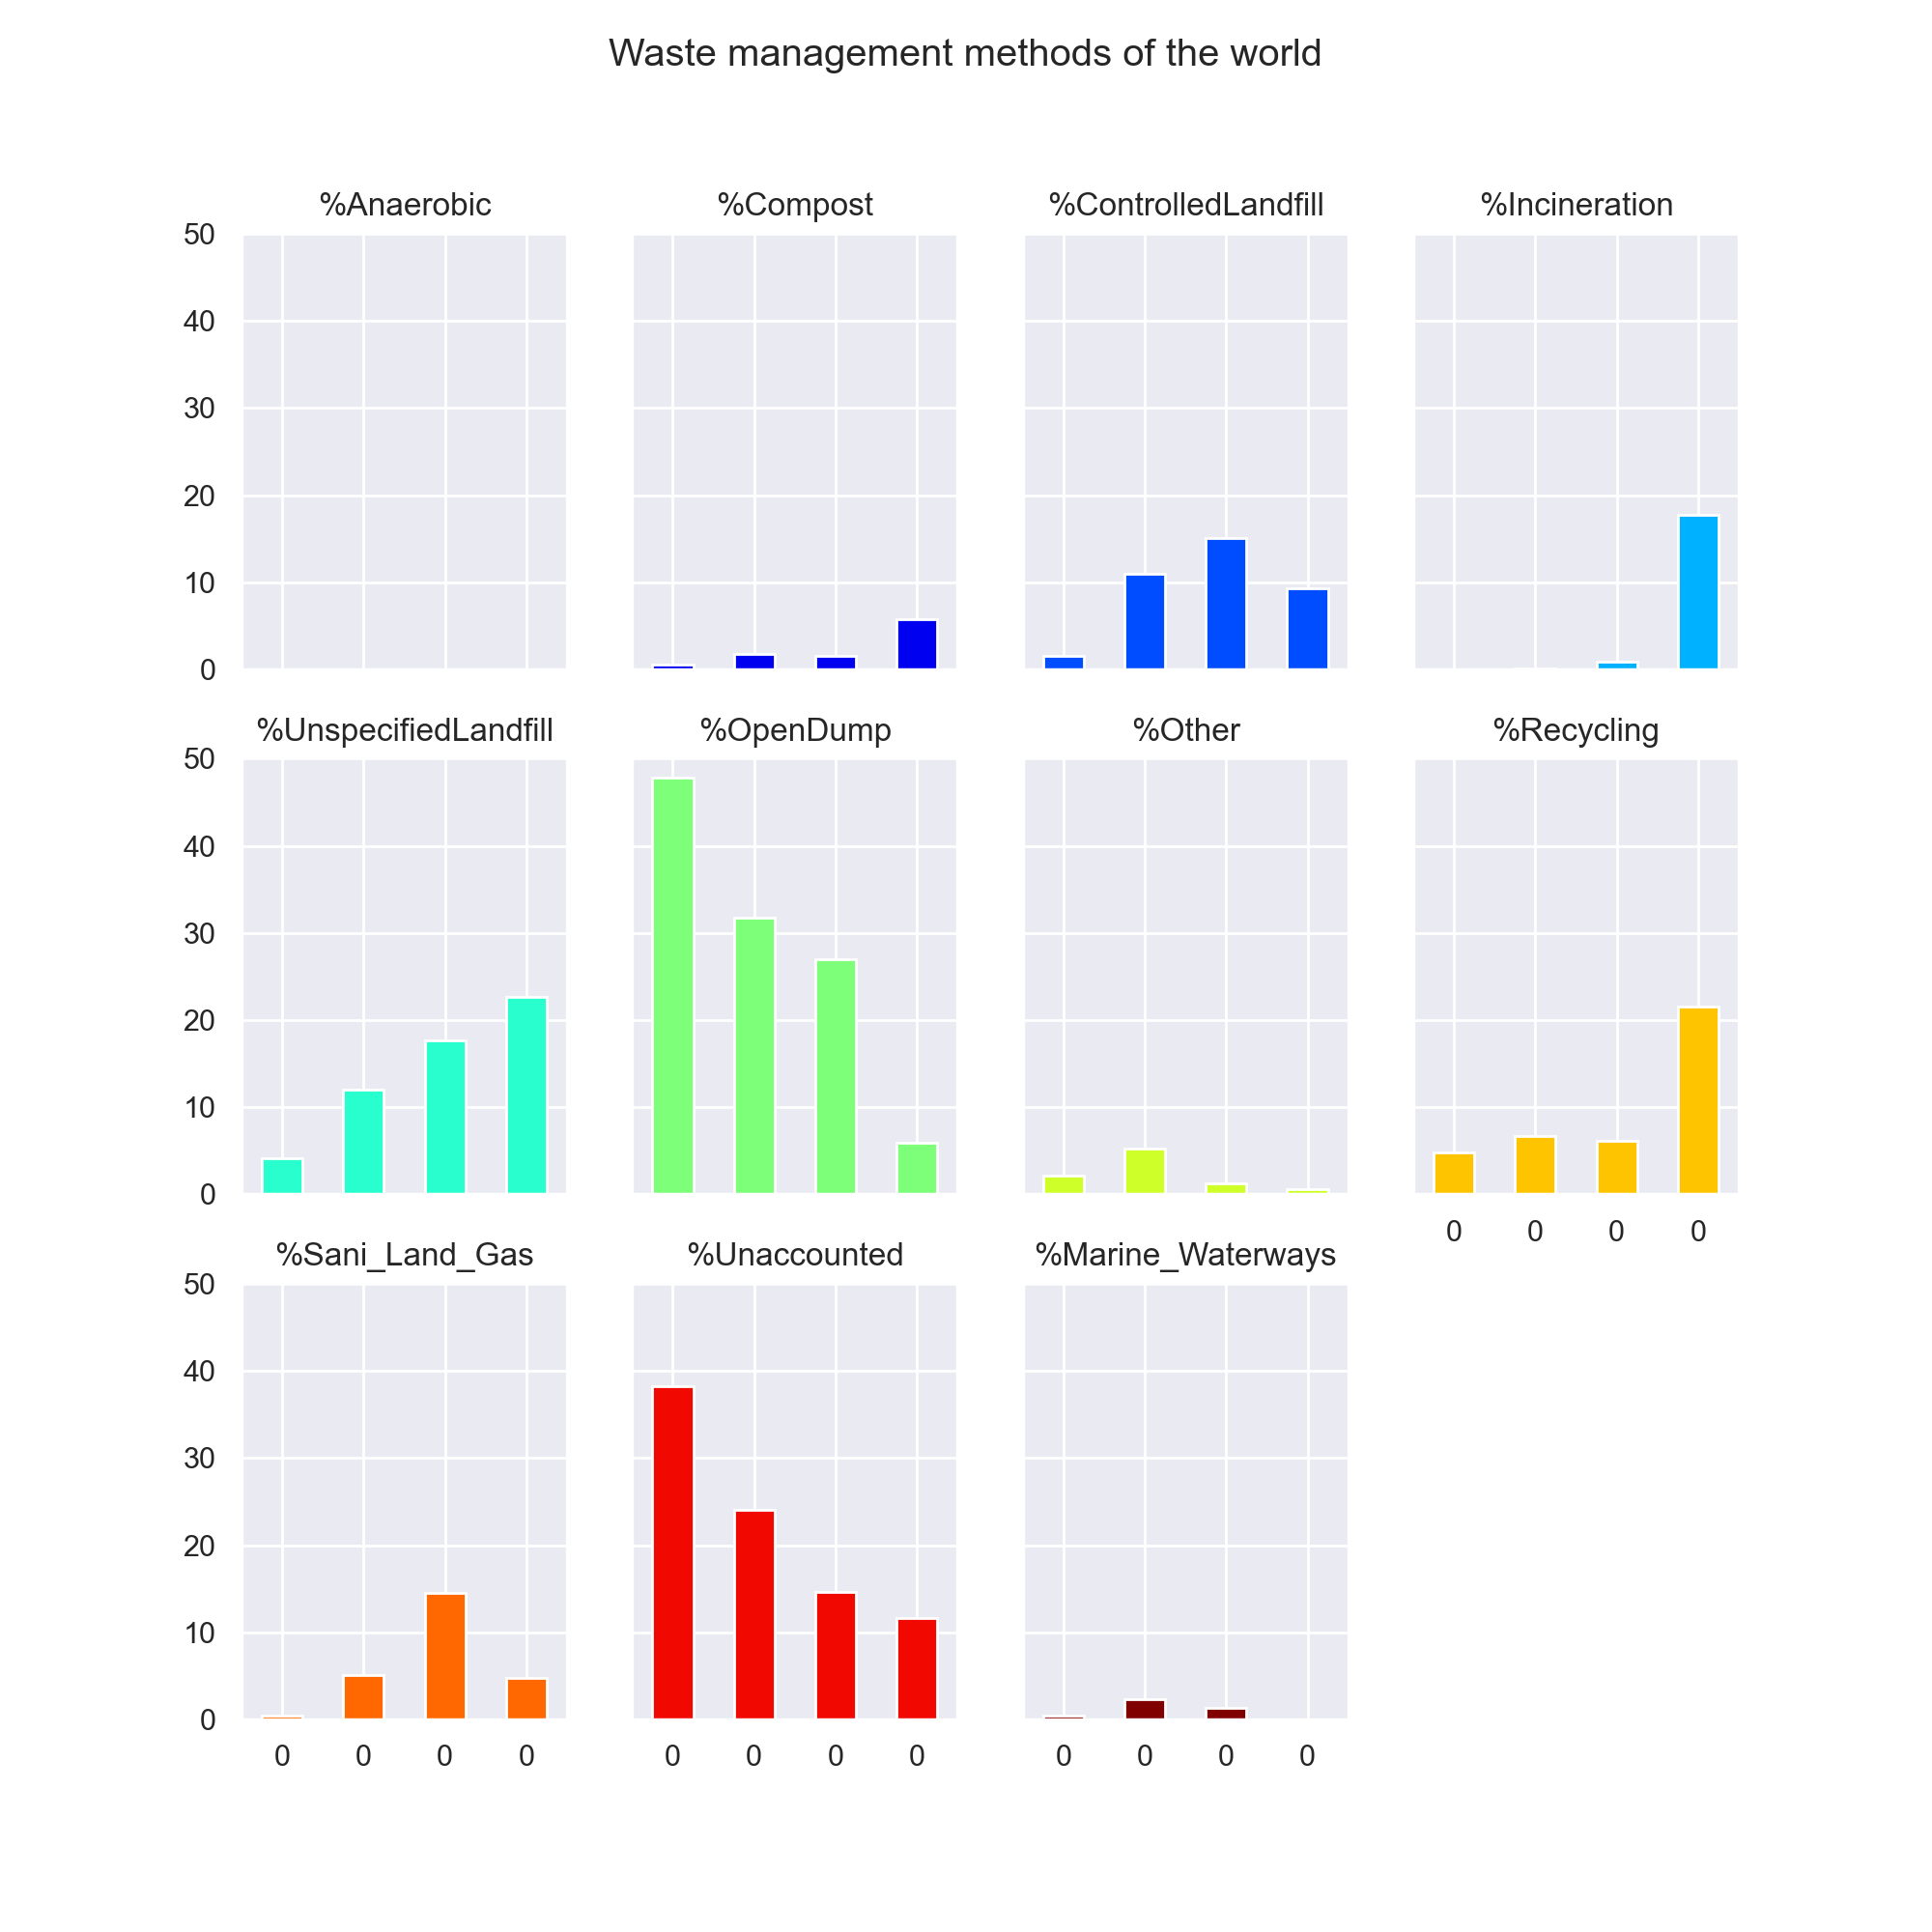

In [144]:
axes = df_all_waste.plot(kind='bar',rot=0,colormap='jet',legend=False, sharex=True, sharey=True, figsize=(10,10),
             title='Waste management methods of the world', subplots=True, layout=(3,4))


plt.savefig('Treatment_Subplots.png')
plt.show()

<IPython.core.display.Javascript object>


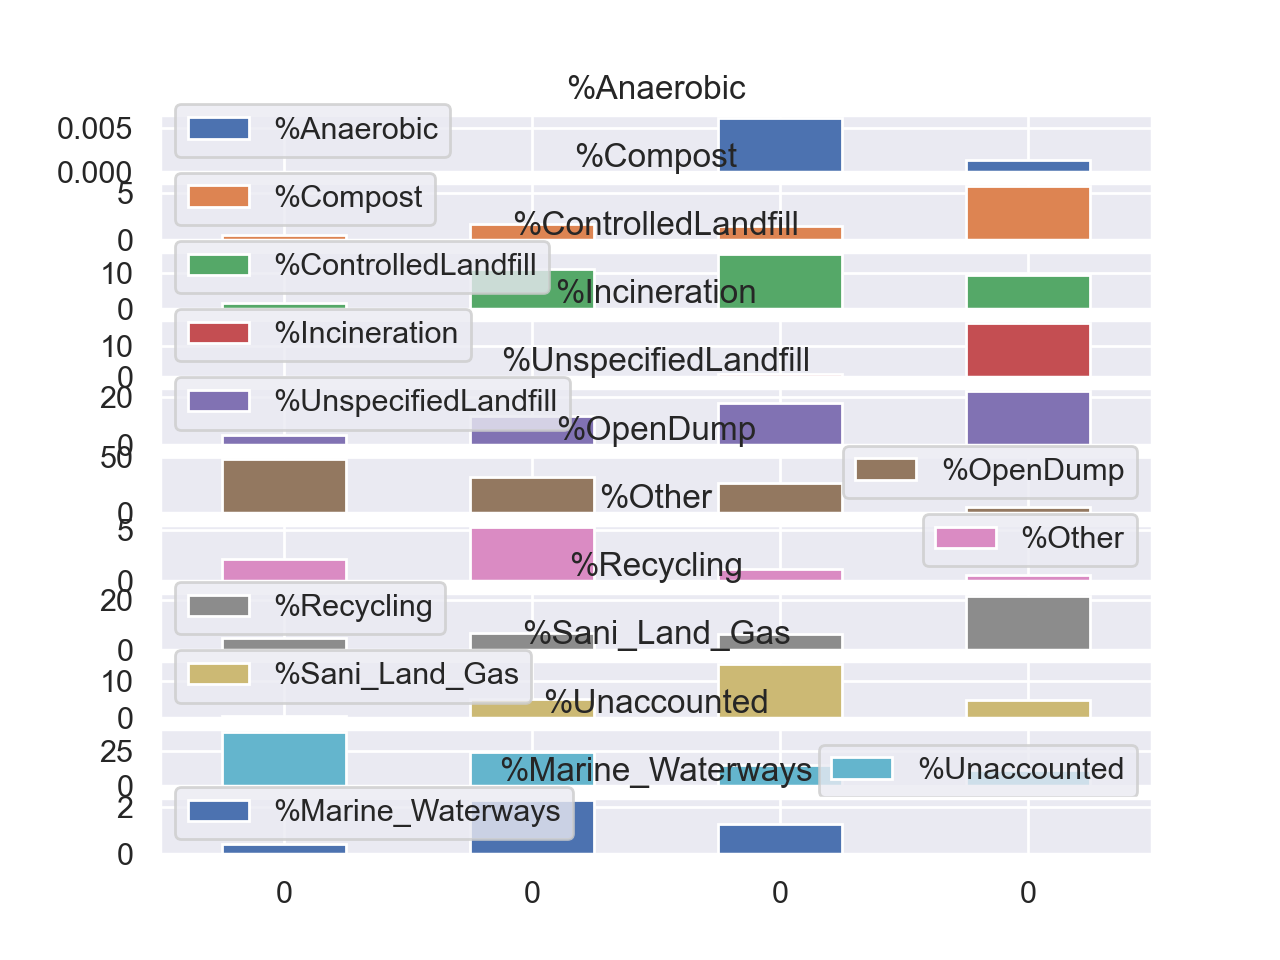

In [146]:
#plt.figure(figsize=(15, 30))
axes = df_all_waste.plot.bar(rot=0, subplots=True)
print(axes)
plt.show()